# Image Analysis
### For inconsistent img width and height analysis

In [11]:
import os
import cv2
import pandas as pd

In [12]:
good, bad = 0, 0
labels1 = pd.read_csv("/home/ubuntu/statues-train/statues_labels.csv")
os.makedirs("good", exist_ok=True)
os.makedirs("bad", exist_ok=True)

In [27]:
labels1.columns

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')

In [13]:
img_paths = {}
image_dir = "../../statues-train/"
for root, _, files in os.walk(image_dir):
    for file in files:
        if not file.lower().endswith(".jpg"):
            continue
        img_paths[file] = os.path.join(root, file)

In [14]:
for i, row in labels1.iterrows():
    img_path = img_paths[row["filename"]]
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    w_, h_ = row["width"], row["height"]

    x1 = row["xmin"]
    y1 = row["ymin"]
    x2 = row["xmax"]
    y2 = row["ymax"]

    if (w / w_) == (h / h_):
        img = cv2.resize(img, (w_, h_))
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imwrite(f"good/{row['filename']}", img)
        good += 1
    else:
        img = cv2.resize(img, (w_, h_))
        mg = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imwrite(f"bad/{row['filename']}", img)
        bad += 1

In [15]:
print("Good:", good)
print("Bad:", bad)

Good: 614
Bad: 265


# Calculate image mean & std

In [2]:
import os
from PIL import Image
import numpy as np

In [5]:
img_paths = []
image_dir = "../../statues-train/"
for root, _, files in os.walk(image_dir):
    for file in files:
        if not file.lower().endswith(".jpg"):
            continue
        img_paths.append(os.path.join(root, file))

mean_mat = np.zeros((len(img_paths), 3))
for i, img_path in enumerate(img_paths):
    img = Image.open(img_path)
    img = np.array(img) / 255.0
    mean = np.mean(img, axis=(0, 1))  # RGB
    mean_mat[i, :] = mean

In [6]:
overall_mean = mean_mat.mean(0)
print(overall_mean)

[0.42208945 0.43337985 0.41648867]


In [7]:
diff = mean_mat - overall_mean
variance = np.mean(np.square(diff), 0)
stddev = np.sqrt(variance)
print(stddev)

[0.11196138 0.1089347  0.12888725]


# Get classwise image size stats

In [8]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [24]:
labels1 = pd.read_csv("/home/ubuntu/statues-train/statues_labels.csv")
labels2 = pd.read_csv(
    "/home/ubuntu/statues-train/statues_labels2.csv",
    names=["filename", "xmin", "ymin", "xmax", "ymax", "class"],
    sep=";",
)

In [25]:
lenin_df = labels1.loc[labels1["class"] == "lenin"]
other_df = labels1.loc[labels1["class"] == "other"]
ataturk_df = labels2.loc[labels2["class"] == "ataturk"]

In [18]:
img_paths = {}
image_dir = "../../statues-train/"
for root, _, files in os.walk(image_dir):
    for file in files:
        if not file.lower().endswith(".jpg"):
            continue
        img_paths[file] = os.path.join(root, file)

In [19]:
def get_image_stat(df):
    img_w, img_h = [], []
    for file in df.filename.unique():
        img = cv2.imread(img_paths[file])
        height, width = img.shape[:2]
        img_w.append(width)
        img_h.append(height)

    img_w = np.array(img_w, dtype=np.float32)
    img_h = np.array(img_h, dtype=np.float32)

    return img_w, img_h

In [20]:
def plot_dist(img_w, img_h):
    plt.subplot(121)
    plt.hist(img_w)
    plt.title("width")

    plt.subplot(122)
    plt.hist(img_h)
    plt.title("height")
    plt.show()

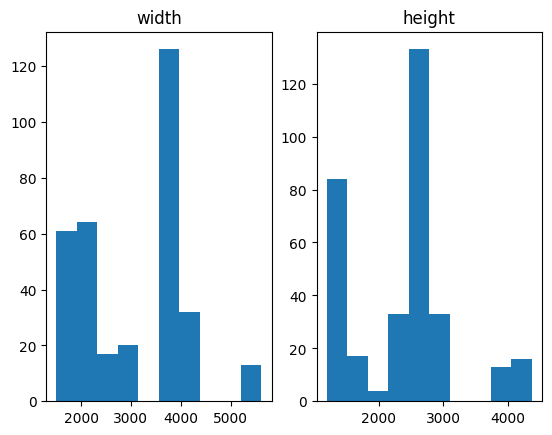

In [21]:
img_w, img_h = get_image_stat(other_df)
plot_dist(img_w, img_h)

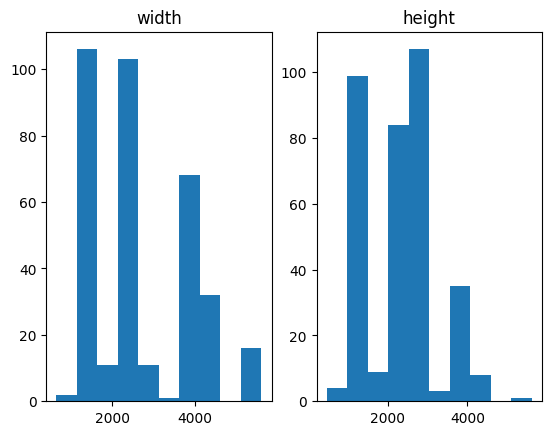

In [22]:
img_w, img_h = get_image_stat(lenin_df)
plot_dist(img_w, img_h)

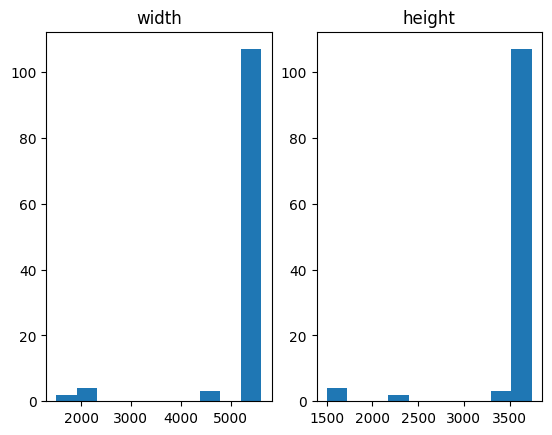

In [26]:
img_w, img_h = get_image_stat(ataturk_df)
plot_dist(img_w, img_h)